# Classification methods and model evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('blood_transfusion.csv')

data.head()

,months_since_last_donation,total_number_of_donations,total_blood_donated,months_since_first_donation,class
0,2.0,50.0,12500.0,98.0,1
1,0.0,13.0,3250.0,28.0,1
2,1.0,16.0,4000.0,35.0,1
3,2.0,20.0,5000.0,45.0,1
4,1.0,24.0,6000.0,77.0,0


# 1. Get dataset on screen

In [2]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_since_last_donation   748 non-null    float64
 1   total_number_of_donations    748 non-null    float64
 2   total_blood_donated          748 non-null    float64
 3   months_since_first_donation  748 non-null    float64
 4   class                        748 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 29.3 KB


,months_since_last_donation,total_number_of_donations,total_blood_donated,months_since_first_donation,class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [3]:
class_counts = data['class'].value_counts()
print(f"\nClass 0 (Did NOT return): {class_counts[0]} ({class_counts[0]/len(data)*100:.1f}%)")
print(f"Class 1 (DID return): {class_counts[1]} ({class_counts[1]/len(data)*100:.1f}%)")

# Average donation patterns by class
print("\nAverage patterns by return status:")
for class_label in [0, 1]:
    class_name = "Returned" if class_label == 1 else "Did NOT return"
    subset = data[data['class'] == class_label]
    print(f"\n{class_name}:")
    print(f"  - Avg months since last donation: {subset['months_since_last_donation'].mean():.1f}")
    print(f"  - Avg total donations: {subset['total_number_of_donations'].mean():.1f}")
    print(f"  - Avg total blood donated (ml): {subset['total_blood_donated'].mean():.1f}")
    print(f"  - Avg months since first donation: {subset['months_since_first_donation'].mean():.1f}")

print("""
The blood center has {total} donors in their database, where only {pct}% return to donate in the following month.
Donors who return tend to have a higher total donations count and donated more blood overall.
This suggests that frequent donors are more likely to return. Understanding these patterns could help the center target and encourage more donations
""".format(total=len(data), pct=round(class_counts[1]/len(data)*100, 1)))


Class 0 (Did NOT return): 570 (76.2%)
Class 1 (DID return): 178 (23.8%)

Average patterns by return status:

Did NOT return:
  - Avg months since last donation: 10.8
  - Avg total donations: 4.8
  - Avg total blood donated (ml): 1200.4
  - Avg months since first donation: 34.8

Returned:
  - Avg months since last donation: 5.5
  - Avg total donations: 7.8
  - Avg total blood donated (ml): 1949.4
  - Avg months since first donation: 32.7

The blood center has 748 donors in their database, where only 23.8% return to donate in the following month.
Donors who return tend to have a higher total donations count and donated more blood overall.
This suggests that frequent donors are more likely to return. Understanding these patterns could help the center target and encourage more donations



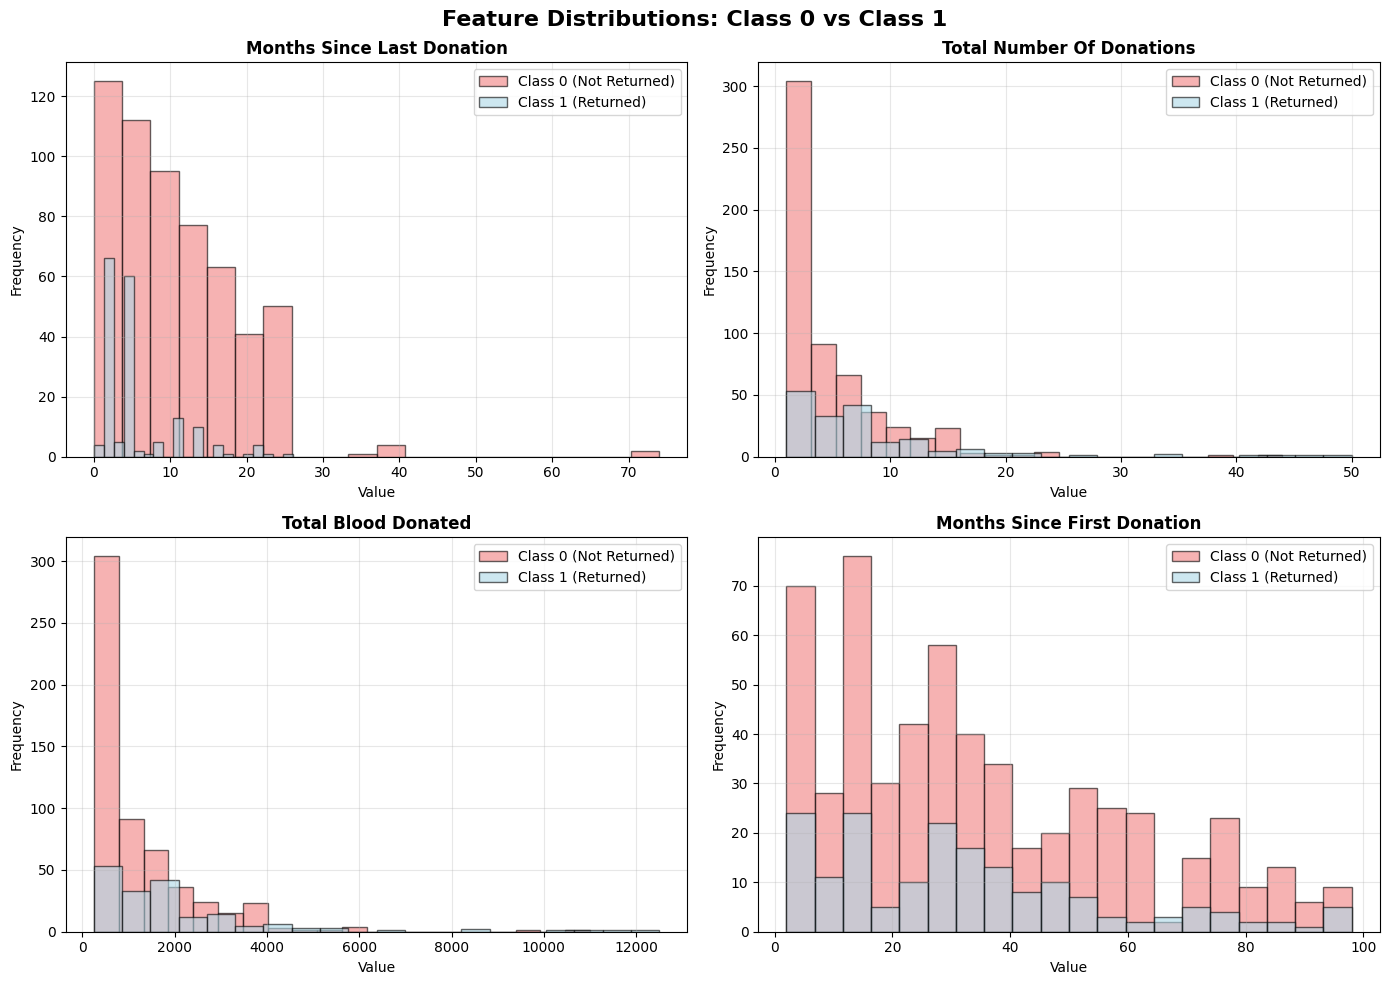

In [4]:
features = ['months_since_last_donation', 'total_number_of_donations', 
            'total_blood_donated', 'months_since_first_donation']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Feature Distributions: Class 0 vs Class 1', 
             fontsize=16, fontweight='bold')

for idx, feature in enumerate(features):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    # Plot histograms for both classes
    ax.hist(data[data['class'] == 0][feature], bins=20, alpha=0.6, 
            label='Class 0 (Not Returned)', color='lightcoral', edgecolor='black')
    ax.hist(data[data['class'] == 1][feature], bins=20, alpha=0.6, 
            label='Class 1 (Returned)', color='lightblue', edgecolor='black')
    
    ax.set_title(feature.replace('_', ' ').title(), fontweight='bold')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Task 2: Preprocessing

In [5]:
from sklearn.preprocessing import StandardScaler

X = data.drop('class', axis=1)
y = data['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = np.array(X_scaled)

# Task 3: Creating a train and test set

In [6]:
from sklearn.model_selection import train_test_split
# Throughout the entire PA keep comparing the different splits and the impact they have on different tasks.

def create_splits(X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, 
                                                        random_state=8, stratify=y)
    
    return X_train, X_test, y_train, y_test 

X_train, X_test, y_train, y_test = create_splits(X_scaled, y, test_size=0.2)



# Task 4: Classification algorithms 

In [58]:
from collections import Counter

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def knn_predict(X_train, y_train, X_test, k):
    distances = []
    
    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], X_test)
        distances.append((dist, y_train.iloc[i]))
    
    distances.sort(key= lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:k]]
    return Counter(k_nearest_labels).most_common(1)[0][0]

y_pred = []
for i in range(len(X_test)):
    y_pred.append(knn_predict(X_train, y_train, X_test[i], k=3))

y_pred_knn = np.array(y_pred)
print(y_pred_knn[:10])
print(y_test.values[:10])

[1 1 0 0 0 1 0 0 0 0]
[1 1 1 0 0 0 1 0 0 0]


In [57]:
from sklearn import naive_bayes

gnb = naive_bayes.GaussianNB()

gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)

# Predict a few new cases and compare the predicted labels with the actual labels.
print(y_pred_gnb[:10])
print(y_test.values[:10])


[0 1 0 0 0 0 0 0 0 0]
[1 1 1 0 0 0 1 0 0 0]


In [62]:
from sklearn import svm

svm = svm.SVC(kernel='rbf', random_state=8)

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print(y_pred_svm[:10])
print(y_test.values[:10])

[0 1 0 0 0 0 0 0 0 0]
[1 1 1 0 0 0 1 0 0 0]


In [60]:
from sklearn import neural_network

mlp = neural_network.MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=2000, random_state=8)

mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

print(y_pred_mlp[:10])
print(y_test.values[:10])

[0 1 0 0 0 0 0 0 0 0]
[1 1 1 0 0 0 1 0 0 0]
